In [6]:
! cd /Users/ruttenv/Documents/projects/nmfx/

In [7]:

path = '/Users/ruttenv/Documents/projects/nmfx/'
import sys
sys.path.append(path)

In [9]:
from nmfx import initialize
import matplotlib.pyplot as pl
from importlib import reload
import numpy as np
from nmfx.kernels import build_K, sample_from_K
from nmfx import losses
from nmfx.utils import log1pexp
from nmfx.parameters import Parameters
import nmfx
from nmfx import kernels
reload(kernels)
reload(nmfx)

<module 'nmfx' from '/Users/ruttenv/Documents/projects/nmfx/nmfx/__init__.py'>

In [10]:
t = 100
k = 5
coords_dim = 3
dim = 30

def generate_toy_data(dim, k, t):
    xv, yv = np.meshgrid(np.arange(dim)/dim, np.arange(dim)/dim)
    coords = np.vstack([xv.flatten()[None], yv.flatten()[None]]).T
    taus = np.linspace(0.001, 0.2, k)[::-1]
    dist = ((coords[None]-coords[:,None])**2).sum(-1)
    dist_coef = [np.exp(-dist/tau) + np.diag(np.arange(dim*dim))*1e-4 for tau in taus]
    Wkd = log1pexp(np.array([np.random.multivariate_normal(np.zeros(dim*dim), K, size = 1) for K in dist_coef])).squeeze()
    H = log1pexp(np.random.randn(t, k))
    X = H@Wkd
    return X, H, Wkd, taus, coords

X, H, Wkd, taus, coordinates = generate_toy_data(dim, k, t)

In [11]:
parameters = Parameters()

In [12]:
nmfx.nmf(X, k, parameters, taus = taus, coordinates = coordinates)

intializing values with nnsvd
time: 0.0007mins
total batch num: 5


ValueError: Non-hashable static arguments are not supported. An error occured during a call to 'update_W_batch_H_step' while trying to hash an object of type <class 'jaxlib.xla_extension.DeviceArray'>, [[[1.         0.9999946  0.9999783  ... 0.99152976 0.99123436 0.9909283 ]
  [0.9999946  1.         0.9999946  ... 0.99181455 0.99152976 0.99123436]
  [0.9999783  0.9999946  1.         ... 0.9920886  0.99181455 0.99152976]
  ...
  [0.99152976 0.99181455 0.9920886  ... 1.         0.9999946  0.9999783 ]
  [0.99123436 0.99152976 0.99181455 ... 0.9999946  1.         0.9999946 ]
  [0.9909283  0.99123436 0.99152976 ... 0.9999783  0.9999946  1.        ]]

 [[1.         0.9999951  0.99998045 ... 0.9923506  0.9920836  0.9918071 ]
  [0.9999951  1.         0.9999951  ... 0.99260783 0.9923506  0.9920836 ]
  [0.99998045 0.9999951  1.         ... 0.9928554  0.99260783 0.9923506 ]
  ...
  [0.9923506  0.99260783 0.9928554  ... 1.         0.9999951  0.99998045]
  [0.9920836  0.9923506  0.99260783 ... 0.9999951  1.         0.9999951 ]
  [0.9918071  0.9920836  0.9923506  ... 0.99998045 0.9999951  1.        ]]

 [[1.         0.99999505 0.99998015 ... 0.99223477 0.99196386 0.9916831 ]
  [0.99999505 1.         0.99999505 ... 0.99249595 0.99223477 0.99196386]
  [0.99998015 0.99999505 1.         ... 0.9927473  0.99249595 0.99223477]
  ...
  [0.99223477 0.99249595 0.9927473  ... 1.         0.99999505 0.99998015]
  [0.99196386 0.99223477 0.99249595 ... 0.99999505 1.         0.99999505]
  [0.9916831  0.99196386 0.99223477 ... 0.99998015 0.99999505 1.        ]]

 [[1.         0.9999811  0.9999243  ... 0.9707335  0.96972394 0.9686787 ]
  [0.9999811  1.         0.9999811  ... 0.97170734 0.9707335  0.96972394]
  [0.9999243  0.9999811  1.         ... 0.9726454  0.97170734 0.9707335 ]
  ...
  [0.9707335  0.97170734 0.9726454  ... 1.         0.9999811  0.9999243 ]
  [0.96972394 0.9707335  0.97170734 ... 0.9999811  1.         0.9999811 ]
  [0.9686787  0.96972394 0.9707335  ... 0.9999243  0.9999811  1.        ]]

 [[1.         0.9999947  0.9999789  ... 0.9917433  0.9914553  0.9911569 ]
  [0.9999947  1.         0.9999947  ... 0.9920209  0.9917433  0.9914553 ]
  [0.9999789  0.9999947  1.         ... 0.9922881  0.9920209  0.9917433 ]
  ...
  [0.9917433  0.9920209  0.9922881  ... 1.         0.9999947  0.9999789 ]
  [0.9914553  0.9917433  0.9920209  ... 0.9999947  1.         0.9999947 ]
  [0.9911569  0.9914553  0.9917433  ... 0.9999789  0.9999947  1.        ]]]. The error was:
TypeError: unhashable type: 'DeviceArray'


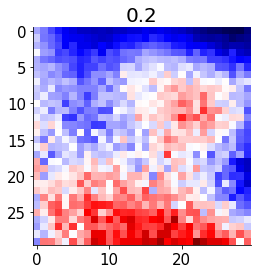

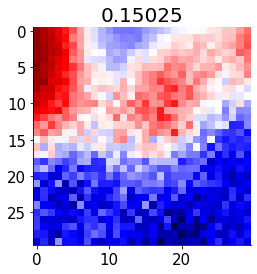

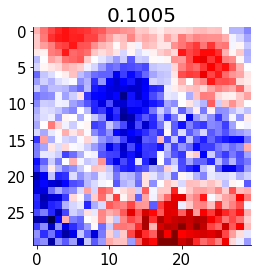

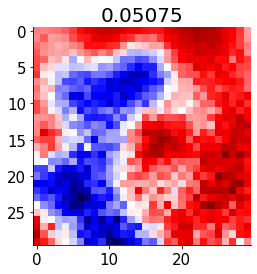

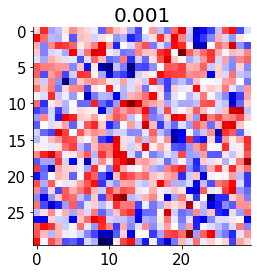

In [221]:
for ind in range(k):
    pl.figure()
    pl.title(taus[ind])
    pl.imshow(x[ind])

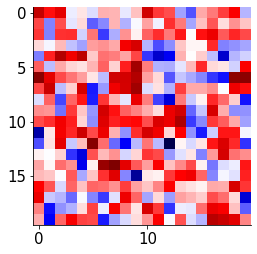

In [98]:

pl.imshow(x.reshape([dim, dim]))

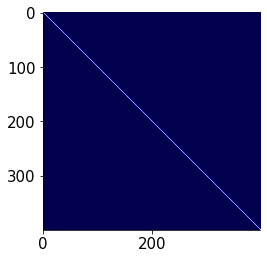

In [91]:
pl.imshow(dist_coef[0])

In [82]:
x = kernels.sample_from_K(K[0])
x

DeviceArray([nan, nan, nan, ..., nan, nan, nan], dtype=float32)

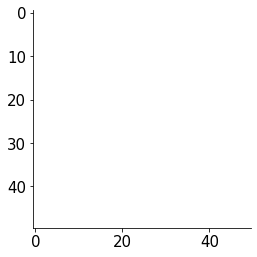

In [74]:
pl.imshow(x.reshape([dim, dim]))


In [ ]:
from nmfx.utils.